In [5]:
# 1. Implement the triangulation algorithm “Algorithm 1: Final version of the ToTal algorithm”, page 572 in reading:
# • Vincent Pierlot and Marc Van Droogenbroeck. “A New Three Object Triangulation
# Algorithm for Mobile Robot Positioning”. In: IEEE, Transactions on Robotics 30.3
# (2014).
# 
# You do not have to consider the special cases described in “Algorithm 2” page 573. Run
# some numerical experiments and plot the results thereof to illustrate how the algorithm
# works.



D = -55.3820932004515
coord: [mpf('1.5222487898355146'), mpf('4.5010651574541889')]


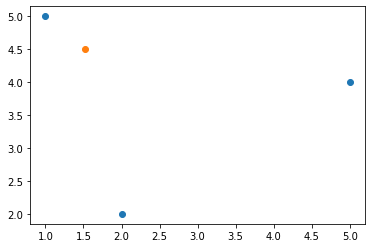

In [18]:

from mpmath import cot
import matplotlib.pyplot as plt
import numpy as np

Coordinates = [[2,2], [1,5], [5,4]]
Angles = [100, 220, 340]


def algo1(coordsX, coordsY, angles):
	x1m = coordsX[0] - coordsX[1]
	x3m = coordsX[2] - coordsX[1]

	y1m = coordsY[0] - coordsY[1]
	y3m = coordsY[2] - coordsY[1]

	T12 = cot(angles[1] - angles[0])
	T23 = cot(angles[2] - angles[1])

	T31 = (1 - T12 * T23) / (T12 + T23)

	x12m = x1m + T12 * y1m
	x23m = x3m - T23 * y3m
	
	y12m = y1m - (T12 * x1m)
	y23m = y3m + (T23 * x3m)

	x31m = (x3m + x1m) + T31 * (y3m - y1m)
	y31m = (y3m + y1m) - T31 * (x3m - x1m)

	k31m = x1m * x3m + y1m * y3m + T31 * (x1m * y3m - x3m * y1m)

	D = (x12m - x23m) * (y23m - y31m) - (y12m - y23m) * (x23m - x31m)

	print(f"D = {D}");
	if D == 0:
		return;
	
	xR = coordsX[1] + (k31m * (y12m - y23m)) / D
	yR = coordsY[1] + (k31m * (x23m - x12m)) / D

	return [xR, yR]

coordinatesx = [i[0] for i in Coordinates]
coordinatesy = [i[1] for i in Coordinates]


coord = algo1(coordinatesx, coordinatesy, Angles)

print(f"coord: {coord}")

plt.scatter(coordinatesx, coordinatesy)

plt.scatter(coord[0], coord[1])


# 2 Device your own trilateration algorithm (or re-implement an existing one) and run some
# numerical experiments and plot the results thereof to illustrate how the algorithm works.
# Consider using RSSI as a distance metric so you can take advantage of your exercise
# solution from earlier. Note, the RSSI and Tx-Rx distance are not proportional; use a
# more correct relationship if you can (hint: look at a common radio propagation model).

